In [58]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import sys
import os
import tqdm
import gc
import copy

from collections import defaultdict
import itertools

import plotly as ply
ply.io.renderers.default="notebook"

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import sklearn as skl
from sklearn.neighbors import KernelDensity

import gridData
from gridData import Grid

In [6]:
pmeVolData_neg200mV=Grid("CX26_neg200mV_last40ns_PME.dx")
pmeVolData_pos200mV=Grid("p200mV.PME.dx")
pmeVolData_neg200mV

<<class 'gridData.core.Grid'> with (128, 128, 168) bins>

In [4]:
dir(pmeVolData)

['_Grid__interpolated',
 '_Grid__interpolation_spline_order',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_export_dx',
 '_export_python',
 '_exporters',
 '_get_exporter',
 '_get_loader',
 '_guess_format',
 '_interpolationFunctionFactory',
 '_len_edges',
 '_load_cpp4',
 '_load_dx',
 '_load_plt',
 '_load_python',
 '_loaders',
 '_map_edges',
 '_max_edges',
 '_midpoints',
 '_min_edges',
 '_update',
 'centers',
 'check_compatible',
 'default_format',
 'delta',
 'edges',
 'export'

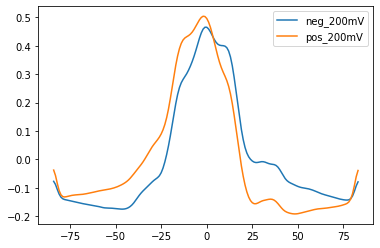

In [8]:
kb=8.617333262E-5
tSim=310.15
kbT=kb*tSim
sns.lineplot(np.arange(168)-168/2,
             kbT*np.mean(pmeVolData_neg200mV.grid,axis=(0,1)),
             label='neg_200mV')
sns.lineplot(np.arange(168)-168/2,
             kbT*np.mean(pmeVolData_pos200mV.grid,axis=(0,1)),
             label='pos_200mV')
plt.show()

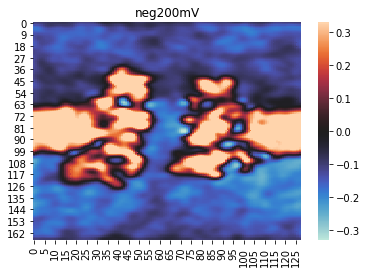

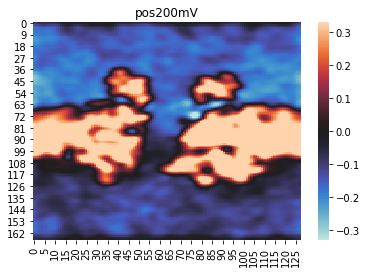

In [49]:
negCrossSect=np.rot90(kbT*pmeVolData_neg200mV.grid[:,64,:])
vcut=np.abs(np.min([
    np.max(negCrossSect),
    np.min(negCrossSect)
]))
sns.heatmap(negCrossSect,center=0,
            vmin=-vcut,vmax=vcut
           )
plt.title('neg200mV')
plt.show()

posCrossSect=np.rot90(kbT*pmeVolData_pos200mV.grid[:,64,:])
vcut=np.abs(np.min([
    np.max(negCrossSect),
    np.min(negCrossSect)
]))
sns.heatmap(posCrossSect,center=0,
            vmin=-vcut,vmax=vcut
           )
plt.title('pos200mV')
plt.show()

In [54]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 2AEE-9105

 Directory of C:\Users\wesle\Documents\Connexin\CX26_PME_Analysis

04/27/2020  12:55 PM    <DIR>          .
04/27/2020  12:55 PM    <DIR>          ..
04/27/2020  09:49 AM    <DIR>          .ipynb_checkpoints
04/27/2020  08:58 AM        24,693,911 CX26_neg200mV_last40ns_PME.dx
04/27/2020  12:29 PM        19,533,535 n200mV.cAMP_Density.dx
04/27/2020  12:28 PM        27,679,141 n200mV.CLA_Density.dx
04/24/2020  02:00 PM       571,732,636 n200mV.last_200frames.dcd
04/27/2020  12:28 PM        26,735,824 n200mV.POT_Density.dx
04/27/2020  12:27 PM        22,230,969 p200mV.cAMP_Density.dx
04/27/2020  12:26 PM        27,765,319 p200mV.CLA_Density.dx
04/27/2020  09:21 AM       571,732,636 p200mV.last_200frames.imaged.dcd
04/27/2020  10:13 AM        24,701,175 p200mV.PME.dx
04/27/2020  12:25 PM        26,378,519 p200mV.POT_Density.dx
04/27/2020  12:55 PM           172,164 PME_Analysis_Notebook.ipynb
04/27/2020  08:58 AM            

In [87]:
densityMapDict={}
ionNameList=['POT','CLA','cAMP','Ion']
simNameList=['p200mV','n200mV']
dataDir='.'
for simName in simNameList:
    for ionName in ionNameList:
        dictKey='.'.join([simName,ionName])
        fileName='.'.join([dictKey+'_Density','dx'])
        filePath='/'.join([dataDir,fileName])
        print("Loading %s; "%fileName,end="")
        densityMapDict[dictKey]=Grid(filePath)
        print(densityMapDict[dictKey].grid.shape,"volumetric grid loaded")

Loading p200mV.POT_Density.dx; (142, 142, 184) volumetric grid loaded
Loading p200mV.CLA_Density.dx; (142, 142, 184) volumetric grid loaded
Loading p200mV.cAMP_Density.dx; (153, 152, 195) volumetric grid loaded
Loading p200mV.Ion_Density.dx; (153, 152, 195) volumetric grid loaded
Loading n200mV.POT_Density.dx; (142, 142, 185) volumetric grid loaded
Loading n200mV.CLA_Density.dx; (142, 142, 186) volumetric grid loaded
Loading n200mV.cAMP_Density.dx; (154, 151, 194) volumetric grid loaded
Loading n200mV.Ion_Density.dx; (154, 151, 194) volumetric grid loaded


Constructing plots for p200mV.POT
Constructing plots for p200mV.CLA
Constructing plots for p200mV.cAMP
Constructing plots for p200mV.Ion
Constructing plots for n200mV.POT
Constructing plots for n200mV.CLA
Constructing plots for n200mV.cAMP
Constructing plots for n200mV.Ion


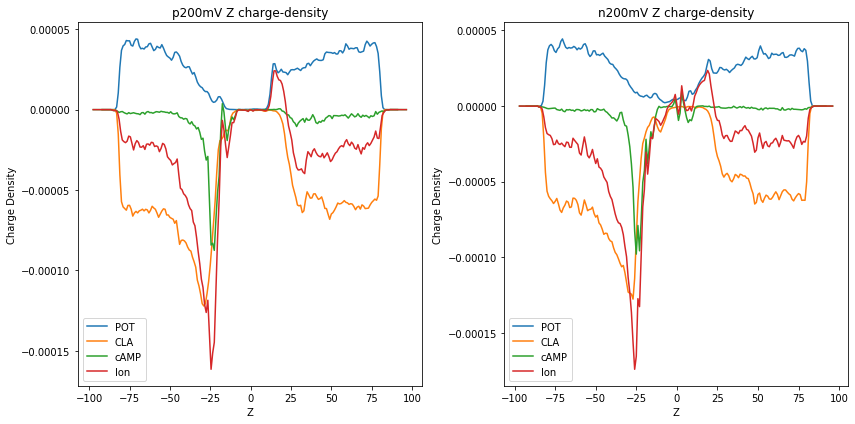

In [88]:
fig,axs=plt.subplots(
    nrows=1, #len(ionNameList)+1, #
    ncols=len(simNameList)
    )

fig.set_figwidth(12)
fig.set_figheight(
        6 #11.0*(len(ionNameList)+1)/len(simNameList)
    )

for iSim,simName in enumerate(simNameList):
    for iIon,ionName in enumerate(ionNameList):
        print("Constructing plots for {sim}.{ion}".format(sim=simName,ion=ionName))
        dataKey='.'.join([simName,ionName])
        densityData=densityMapDict[dataKey].grid
        
        zDensity=np.mean(densityData,axis=(0,1))
        #zDensity=zDensity/np.sum(zDensity)
        #ax=axs[0][iSim]
        ax=axs[iSim]
        sns.lineplot(
            x=np.arange(densityData.shape[2])-densityData.shape[2]/2,
            y=zDensity,
            label=ionName,ax=ax)
        ax.set_title('{sim} Z charge-density'.format(sim=simName))
        ax.set_xlabel('Z')
        ax.set_ylabel('Charge Density')
        
        #ymid=int(np.round(densityData.shape[1]/2.))
        #xzDensity=np.rot90(densityData[:,ymid,:])
        ##xzDensity=xzDensity/np.sum(xzDensity)
        #ax=axs[iIon+1][iSim]
        #sns.heatmap(xzDensity,vmin=0,ax=ax)
        #ax.set_title('{sim}.{ion} XZ charge-density'.format(
        #    sim=simName,ion=ionName))
        #ax.set_xlabel('X')
        #ax.set_ylabel('Z')
plt.tight_layout()
plt.show()